<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/random_forest_classifier_2_eurusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
#using eurusd, change to your preferred asset
eu = pd.read_csv('EURUSD1440.csv')
eu.tail(2)

,1971.01.04,00:00,0.53690,0.53690.1,0.53690.2,0.53690.3,1
12764,2021.11.09,00:00,1.15830,1.16086,1.15696,1.15941,84682
12765,2021.11.10,00:00,1.15915,1.15924,1.15907,1.15916,196


In [2]:
eu.columns=['Date','Time','eu_Open','eu_High','eu_Low','eu_Close','Volume']
#Use D1 at least 2000 observations, change below for the number of rows you have.
#session crash or slow computing time may require you to use less rows. 
#eu = eu.iloc[-2000:] 
eu = eu.iloc[-8000:] 
eu = eu.reset_index(drop=True)
eu['Index']=eu.index
eu.set_index('Index', drop=True, append=False, inplace=True, verify_integrity=False)
#and make index a feature
eu.reset_index(inplace=True)
#drop last rows if needed
eu = eu[:-1]
print(eu.head())
print(eu.tail())

   Index        Date   Time  eu_Open  eu_High  eu_Low  eu_Close  Volume
0      0  1990.08.30  00:00   1.2494   1.2510  1.2454    1.2503    1031
1      1  1990.08.31  00:00   1.2503   1.2555  1.2387    1.2407    2401
2      2  1990.09.03  00:00   1.2400   1.2429  1.2325    1.2348    1561
3      3  1990.09.04  00:00   1.2351   1.2429  1.2327    1.2381    1741
4      4  1990.09.05  00:00   1.2375   1.2559  1.2368    1.2554    2031
      Index        Date   Time  eu_Open  eu_High   eu_Low  eu_Close  Volume
7994   7994  2021.11.03  00:00  1.15801  1.16161  1.15621   1.16123   89626
7995   7995  2021.11.04  00:00  1.16085  1.16163  1.15281   1.15541   85558
7996   7996  2021.11.05  00:00  1.15505  1.15732  1.15132   1.15662   85159
7997   7997  2021.11.08  00:00  1.15610  1.15949  1.15503   1.15869   67543
7998   7998  2021.11.09  00:00  1.15830  1.16086  1.15696   1.15941   84682


In [3]:
#new row for classifier
eu['binary_direction'] = (eu.eu_Close > eu.eu_Open) &  ((eu.eu_High - eu.eu_Open) > (eu.eu_Open-eu.eu_Low) )
eu.binary_direction = eu.binary_direction.replace({True:1,False:0})
eu.tail(10)

,Index,Date,Time,eu_Open,eu_High,eu_Low,eu_Close,Volume,binary_direction
7989,7989,2021.10.27,00:00,1.15868,1.16257,1.15848,1.16025,85984,1
7990,7990,2021.10.28,00:00,1.16018,1.16919,1.15821,1.16822,112541,1
7991,7991,2021.10.29,00:00,1.16794,1.16899,1.15350,1.15622,100657,0
7992,7992,2021.11.01,00:00,1.15567,1.16088,1.15458,1.16064,71633,1
7993,7993,2021.11.02,00:00,1.16019,1.16132,1.15750,1.15790,74444,0
7994,7994,2021.11.03,00:00,1.15801,1.16161,1.15621,1.16123,89626,1
7995,7995,2021.11.04,00:00,1.16085,1.16163,1.15281,1.15541,85558,0
7996,7996,2021.11.05,00:00,1.15505,1.15732,1.15132,1.15662,85159,0
7997,7997,2021.11.08,00:00,1.15610,1.15949,1.15503,1.15869,67543,1
7998,7998,2021.11.09,00:00,1.15830,1.16086,1.15696,1.15941,84682,1


In [4]:
#for close prediction
#select rows to use for x,y
x = eu.iloc[:,[0]].values
print(x)
y = eu.iloc[:,[8]].values
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [7996]
 [7997]
 [7998]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [6]:
#for close prediction and accuracy test
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier
# create regressor object
classifier = RandomForestClassifier(n_estimators = 40000, n_jobs=-1, random_state = 1)
# fit the regressor with x and y data
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [12]:
y_pred = classifier.predict(X_test)

In [8]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#for classifier score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Confusion Matrix:
[[759 583]
 [622 436]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1342
           1       0.43      0.41      0.42      1058

    accuracy                           0.50      2400
   macro avg       0.49      0.49      0.49      2400
weighted avg       0.50      0.50      0.50      2400

Accuracy: 0.4979166666666667


In [14]:
#for binary prediction
y_pred = classifier.predict(np.array(7999).reshape(1, 1)) # test the output by changing values
y_pred

array([0])

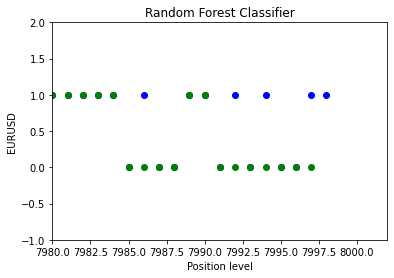

In [15]:
#for close prediction
# Visualising the Random Forest Regression results

# arange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arange(min(x), max(x), 1)

# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value				
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot for original data
plt.scatter(x, y, color = 'blue')

# plot predicted data
plt.scatter(X_grid, classifier.predict(X_grid),
		color = 'green')
plt.title('Random Forest Classifier')
plt.xlabel('Position level')
plt.ylabel('EURUSD')
plt.xlim(7980,8002)
plt.ylim(-1,2)
plt.show()
